In [1]:
data_path = 'Z:\DEV\weather-forcast\CCTV_DATA'
train_label_data_path = data_path+'\data\Training\label'
val_label_data_path = data_path+'\data\Validation\label'
train_train_data_path = data_path+'\data\Training\\train'
val_train_data_path = data_path+'\data\Validation\\train'

In [3]:
import os
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
# import albumentations as A
from torchvision import models
from PIL import Image
from torchinfo import summary
from torch.utils.data import Dataset, DataLoader
# from albumentations.pytorch.transforms import ToTensorV2

In [4]:
r_train_df = pd.read_csv(data_path+'/final_train_df.csv')
r_test_df = pd.read_csv(data_path+'/final_test_df.csv')
r_train_df_label = pd.read_csv(data_path+'/final_train_df_label.csv')
r_test_df_label = pd.read_csv(data_path+'/final_test_df_label.csv')
r_train_df = r_train_df.drop(columns=['Unnamed: 0'])
r_test_df = r_test_df.drop(columns=['Unnamed: 0'])
r_train_df_label = r_train_df_label.drop(columns=['Unnamed: 0'])
r_test_df_label = r_test_df_label.drop(columns=['Unnamed: 0'])


In [41]:
dir = "Z:/DEV/weather-forcast/CCTV_DATA/data/"
save_path = "Z:/DEV/weather-forcast/CCTV_DATA/data/test_epoch1.pt"

train_file_paths = r_train_df['filename']
train_lables = r_train_df_label['weather']
lable_num = 0
val_file_paths = r_test_df['filename']
val_lables = r_test_df_label['weather']
r_train_df_len = len(r_train_df)
r_test_df_len = len(r_test_df)
test_path = []

val_data = {"numpy": [], "label": []}
val_shape = np.zeros(3)
train_data = {"numpy": [], "label": []}
train_shape = np.zeros(3)
test_data = {"numpy": [], "label": []}
test_shape = np.zeros(3)


for file_path in val_file_paths[::300]:
    label = val_lables[lable_num]
    img = Image.open(dir+'Validation/img/'+file_path+'.jpg')
    img_resized = img.resize((640, 480))  # 이미지를 640x480 크기로 resize
    img_array = np.array(img_resized, dtype=np.uint8)
    
    val_shape = val_shape + img_array.shape
    val_data["numpy"].append(img_array)
    val_data["label"].append(label)
    lable_num += 1*300
    print('val 데이터 진행율 : ',lable_num,'/',r_test_df_len)

lable_num = 0
for file_path in train_file_paths[::300]:
    label = train_lables[lable_num]
    img = Image.open(dir+'Training/img/'+file_path+'.jpg')
    img_resized = img.resize((640, 480))  # 이미지를 640x480 크기로 resize
    img_array = np.array(img_resized, dtype=np.uint8)

    if lable_num < int(r_train_df_len*0.9):
        train_shape = train_shape + img_array.shape
        train_data["numpy"].append(img_array)
        train_data["label"].append(label)

    else:
        test_path.append(file_path)
        test_shape = test_shape + img_array.shape
        test_data["numpy"].append(img_array)
        test_data["label"].append(label)
    lable_num += 1*300
    print('학습 데이터 진행율 : ',lable_num,'/',r_train_df_len)




train_data["label"] = pd.get_dummies(train_data["label"])
val_data["label"] = pd.get_dummies(val_data["label"])
test_data["label"] = pd.get_dummies(test_data["label"])

train_avg_shape = train_shape / len(train_data["numpy"])
val_avg_shape = val_shape / len(val_data["numpy"])
test_avg_shape = test_shape / len(test_data["numpy"])

print(f"/n/n###데이터 셋 별 평균 이미지 크기 확인###/n!!!!WARNING!!!!")
print(f"1. train데이터 평균 이미지 크기 : {train_avg_shape}")
print(f"2. val데이터 평균 이미지 크기 : {val_avg_shape}")
print(f"3. test데이터 평균 이미지 크기 : {test_avg_shape}")


    
train_data, val_data, test_data,test_path = train_data, val_data, test_data,test_path
class_num = len(set(train_data["label"]))

val 데이터 진행율 :  300 / 3333
val 데이터 진행율 :  600 / 3333
val 데이터 진행율 :  900 / 3333
val 데이터 진행율 :  1200 / 3333
val 데이터 진행율 :  1500 / 3333
val 데이터 진행율 :  1800 / 3333
val 데이터 진행율 :  2100 / 3333
val 데이터 진행율 :  2400 / 3333
val 데이터 진행율 :  2700 / 3333
val 데이터 진행율 :  3000 / 3333
val 데이터 진행율 :  3300 / 3333
val 데이터 진행율 :  3600 / 3333
학습 데이터 진행율 :  300 / 31909
학습 데이터 진행율 :  600 / 31909
학습 데이터 진행율 :  900 / 31909
학습 데이터 진행율 :  1200 / 31909
학습 데이터 진행율 :  1500 / 31909
학습 데이터 진행율 :  1800 / 31909
학습 데이터 진행율 :  2100 / 31909
학습 데이터 진행율 :  2400 / 31909
학습 데이터 진행율 :  2700 / 31909
학습 데이터 진행율 :  3000 / 31909
학습 데이터 진행율 :  3300 / 31909
학습 데이터 진행율 :  3600 / 31909
학습 데이터 진행율 :  3900 / 31909
학습 데이터 진행율 :  4200 / 31909
학습 데이터 진행율 :  4500 / 31909
학습 데이터 진행율 :  4800 / 31909
학습 데이터 진행율 :  5100 / 31909
학습 데이터 진행율 :  5400 / 31909
학습 데이터 진행율 :  5700 / 31909
학습 데이터 진행율 :  6000 / 31909
학습 데이터 진행율 :  6300 / 31909
학습 데이터 진행율 :  6600 / 31909
학습 데이터 진행율 :  6900 / 31909
학습 데이터 진행율 :  7200 / 31909
학습 데이터 진행율 :  7500 / 31909
학습 데이터 

In [43]:
test_data["label"]

,f,r,s
0,True,False,False
1,False,True,False
2,False,True,False
3,False,False,True
4,True,False,False
5,False,True,False
6,False,True,False
7,False,True,False
8,False,False,True
9,False,False,True


In [44]:
from torchvision import transforms

# dataset class
class dataset(Dataset):
    def __init__(self, data):
        self.x = data["numpy"]
        self.y = data["label"]
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            # 추가적인 전처리나 변환을 여기에 추가할 수 있습니다.
        ])

    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        single_x = self.x[index]
        single_y = self.y.iloc[index]
        single_y = torch.tensor(single_y)

        augmented = self.transform(single_x)

        normalized = self.normalization(augmented)
        return normalized, single_y

    def normalization(self, tensor):
        normalized_tensor = (tensor - tensor.min()) / (tensor.max() - tensor.min())
        return normalized_tensor


train_dataset = dataset(train_data)
val_dataset = dataset(val_data)
test_dataset = dataset(test_data)

print("\n###데이터셋 정의완료###")

train_batch = 16
val_batch = 1
test_batch = 1

train_dataloader = DataLoader(train_dataset, batch_size=train_batch, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=val_batch)
test_dataloader = DataLoader(test_dataset, batch_size=test_batch)

print("###데이터로더 정의완료###")



###데이터셋 정의완료###
###데이터로더 정의완료###


In [49]:
class network(nn.Module):
    def __init__(self, class_num):
        super().__init__()
        self.class_num = class_num
        self.init = torch.nn.Conv2d(in_channels=3, out_channels=3, kernel_size=(1, 1))
        self.model = models.resnet18(pretrained=True)
        self.num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Linear(
            in_features=self.num_ftrs, out_features=self.class_num
        )
        
        # self.softmax = torch.nn.Softmax(dim=1)
        self.sigmoid = nn.Sigmoid()  # 시그모이드 함수 추가
        
    def forward(self, x):
        output = self.init(x)
        output = self.model(output)
        # output = self.softmax(output)
        output = self.sigmoid(output)  # 시그모이드 함수 적용

        return output
        
        
model = network(class_num=class_num)
print("###모델 정의 완료(resnet18)###\n", summary(model))

###모델 정의 완료(resnet18)###
Layer (type:depth-idx)                        Param #
network                                       --
├─Conv2d: 1-1                                 12
├─ResNet: 1-2                                 --
│    └─Conv2d: 2-1                            9,408
│    └─BatchNorm2d: 2-2                       128
│    └─ReLU: 2-3                              --
│    └─MaxPool2d: 2-4                         --
│    └─Sequential: 2-5                        --
│    │    └─BasicBlock: 3-1                   73,984
│    │    └─BasicBlock: 3-2                   73,984
│    └─Sequential: 2-6                        --
│    │    └─BasicBlock: 3-3                   230,144
│    │    └─BasicBlock: 3-4                   295,424
│    └─Sequential: 2-7                        --
│    │    └─BasicBlock: 3-5                   919,040
│    │    └─BasicBlock: 3-6                   1,180,672
│    └─Sequential: 2-8                        --
│    │    └─BasicBlock: 3-7                   3,673,08

###데이터로더 정의완료###
###모델 정의 완료(resnet18)###
Layer (type:depth-idx)                        Param #
network                                       --
├─Conv2d: 1-1                                 12
├─ResNet: 1-2                                 --
│    └─Conv2d: 2-1                            9,408
│    └─BatchNorm2d: 2-2                       128
│    └─ReLU: 2-3                              --
│    └─MaxPool2d: 2-4                         --
│    └─Sequential: 2-5                        --
│    │    └─BasicBlock: 3-1                   73,984
│    │    └─BasicBlock: 3-2                   73,984
│    └─Sequential: 2-6                        --
│    │    └─BasicBlock: 3-3                   230,144
│    │    └─BasicBlock: 3-4                   295,424
│    └─Sequential: 2-7                        --
│    │    └─BasicBlock: 3-5                   919,040
│    │    └─BasicBlock: 3-6                   1,180,672
│    └─Sequential: 2-8                        --
│    │    └─BasicBlock: 3-7          

C:\Users\jhp12\AppData\Local\Temp\ipykernel_21928\2104231007.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  single_y = torch.tensor(single_y)


0.8296850323677063
0.787423312664032
0.7717943787574768
0.8432561755180359
0.7455176711082458
0.7265127301216125
epoch : 0 The train loss is 0.7840315500895182, valid loss is 0.7955709000428518
0.7160324454307556
0.6904352307319641
0.6823295950889587
0.6939764022827148
0.7282801270484924
0.685605525970459
epoch : 1 The train loss is 0.6994432210922241, valid loss is 0.6957305669784546
0.6797747611999512
0.6753215789794922
0.6850636601448059
0.6687498688697815
0.6778225898742676
0.7102372646331787
epoch : 2 The train loss is 0.6828282872835795, valid loss is 0.6937327881654104
0.6732425689697266
0.6733223795890808
0.6806607842445374
0.6782402396202087
0.6755598187446594
0.6620700359344482
epoch : 3 The train loss is 0.6738493045171102, valid loss is 0.6969803820053736
0.6460961699485779
0.6508613228797913
0.6336531043052673
0.6583145260810852
0.6413350701332092
0.6733292937278748
epoch : 4 The train loss is 0.6505982478459676, valid loss is 0.6988734404246012
0.647075355052948
0.6325119

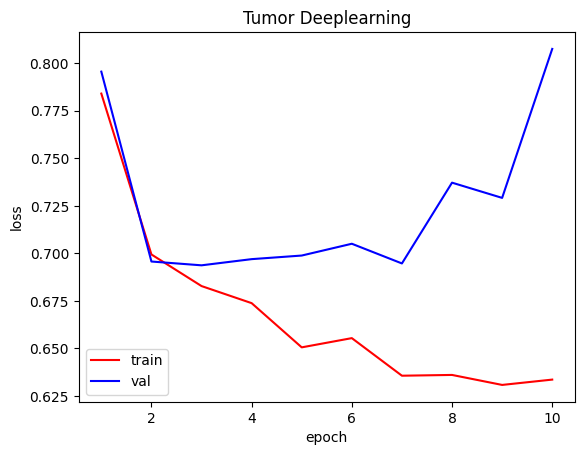

In [50]:
lr = 0.001
step_size = 30
gamma = 0.01
total_epoch = 10
train_dataloader = DataLoader(train_dataset, batch_size=train_batch,shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=val_batch)
test_dataloader = DataLoader(test_dataset, batch_size=test_batch)

print("###데이터로더 정의완료###")

model = network(class_num=class_num)
print("###모델 정의 완료(resnet18)###\n", summary(model))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device=device)
print(f"\n### The device is --{device}-- that we use ###")
phase = input(str("Do you want to train ? (y or n) : "))

if phase == "y":
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.StepLR(
        optimizer=optimizer, step_size=step_size, gamma=gamma
    )
    criterion = nn.BCEWithLogitsLoss()

    total_loss = {"Train": [], "Val": []}

    for epoch in range(total_epoch):

        model.train()
        epoch_train_loss = 0.0

        for batch_index in (train_dataloader):
            inputs, labels = batch_index
            inputs = inputs.float()
            labels = labels.float()
            optimizer.zero_grad()  # 초기화

            if device == torch.device("cuda"):
                inputs.to(device=device)
                outputs = model(inputs)
            else:
                outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            batch_train_loss = loss.item()  # loss만 가져오기
            print(batch_train_loss)
            # print(batch_train_loss)
            loss.backward()  # 역전파 기록 저장
            optimizer.step()  # 업데이트
            epoch_train_loss += batch_train_loss

        avg_train_loss = epoch_train_loss / len(train_dataloader)

        model.eval()
        val_epoch_loss = 0.0

        for batch_index in (val_dataloader):
            inputs, labels = batch_index
            inputs = inputs.float()
            labels = labels.float()

            with torch.no_grad():
                if device == torch.device("cuda"):
                    inputs.to(device=device)
                    outputs = model(inputs)

                else:
                    outputs = model(inputs)

                loss = criterion(outputs, labels)
                val_batch_loss = loss.item()
                val_epoch_loss += val_batch_loss

        avg_val_loss = val_epoch_loss / len(val_dataloader)

        total_loss["Train"].append(avg_train_loss)
        total_loss["Val"].append(avg_val_loss)

        print(
            f"epoch : {epoch} The train loss is {avg_train_loss}, valid loss is {avg_val_loss}"
        )


        scheduler.step()

    torch.save(model.state_dict(),save_path)

    x = np.arange(1, total_epoch + 1)
    plt.plot(x, total_loss["Train"], "r", label="train")
    plt.plot(x, total_loss["Val"], "b", label="val")
    plt.legend()
    plt.title("Tumor Deeplearning")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.show()

elif phase == "n":
    test_results = []
    grad_image = []
    model = network(class_num=class_num)
    model.load_state_dict(torch.load(save_path))
    model.eval()

    for i,batch_index in enumerate(test_dataloader):
        inputs, labels = batch_index
        inputs = inputs.float()
        labels = labels[0]
        result1 = torch.where(labels == labels.max())[0]

        with torch.no_grad():
            outputs = model(inputs)[0]
            result2= torch.where(outputs == outputs.max())[0]

        test_result = True if result1 == result2 else False
        print(test_result)
        test_results.append(test_result)
        

    ok = test_results.count(True)
    ng = test_results.count(False)
    accuracy = ok / (ok+ng)
    print(f"Test 결과 OK 개수:{ok}, NG개수:{ng}, 정확도 : {accuracy}")

In [ ]:
!pip install grad-cam

     ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.8 MB 435.7 kB/s eta 0:00:18
     ---------------------------------------- 0.0/7.8 MB 393.8 kB/s eta 0:00:20
     - -------------------------------------- 0.2/7.8 MB 1.3 MB/s eta 0:00:06
     ------------ --------------------------- 2.5/7.8 MB 13.1 MB/s eta 0:00:01
     ---------------------- ----------------- 4.4/7.8 MB 18.6 MB/s eta 0:00:01
     -------------------------------- ------- 6.2/7.8 MB 22.1 MB/s eta 0:00:01
     -------------------------------------- - 7.5/7.8 MB 22.9 MB/s eta 0:00:01
     ---------------------------------------- 7.8/7.8 MB 21.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Prepari

In [49]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
import cv2

cam = GradCAM(model=model,target_layer=model.gradlayer,use_cuda=False)
grayscale_img = cam(input_tensor=inputs)
            
rgb_img = np.array(inputs).squeeze()
rgb_img = cv2.cvtColor(rgb_img,cv2.COLOR_GRAY2RGB)
visualization = show_cam_on_image(img=rgb_img,mask=grayscale_img)

cam_PIL = Image.fromarray(visualization)
save_grad_path = test_path[i].split(".jpg")[0]+".png"
cam_PIL.save(save_grad_path,format="png")   

AttributeError: 'network' object has no attribute 'gradlayer'

In [2]:
from torchmetrics import F1Score, Accuracy

In [3]:
학습_코드 = 001

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (1254907593.py, line 1)